In [3]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.2 MB/s eta 0:00:00:00:0100:01


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

import sweetviz as sv  
import plotly.express as px
import ast
from collections import Counter
import matplotlib.pyplot as plt


import librosa
import seaborn as sns
import plotly.graph_objs as go
from IPython.display import Audio

# birdclef train_metadata 分析与可视化

## 1. 读入数据
pandas

In [6]:
trainmeta_df = pd.read_csv("/kaggle/input/birdclef-2024/train_metadata.csv")
trainmeta_df.info()
trainmeta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB


,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,asbfly,[],['call'],39.2297,118.1987,Muscicapa dauurica,Asian Brown Flycatcher,Matt Slaymaker,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/134896,asbfly/XC134896.ogg
1,asbfly,[],['song'],51.4030,104.6401,Muscicapa dauurica,Asian Brown Flycatcher,Magnus Hellström,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/164848,asbfly/XC164848.ogg
2,asbfly,[],['song'],36.3319,127.3555,Muscicapa dauurica,Asian Brown Flycatcher,Stuart Fisher,Creative Commons Attribution-NonCommercial-Sha...,2.5,https://www.xeno-canto.org/175797,asbfly/XC175797.ogg
3,asbfly,[],['call'],21.1697,70.6005,Muscicapa dauurica,Asian Brown Flycatcher,vir joshi,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/207738,asbfly/XC207738.ogg
4,asbfly,[],['call'],15.5442,73.7733,Muscicapa dauurica,Asian Brown Flycatcher,Albert Lastukhin & Sergei Karpeev,Creative Commons Attribution-NonCommercial-Sha...,4.0,https://www.xeno-canto.org/209218,asbfly/XC209218.ogg


使用sweetviz，生成report.html

In [7]:
analysis = sv.analyze(trainmeta_df) 
analysis.show_html('report.html') 

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


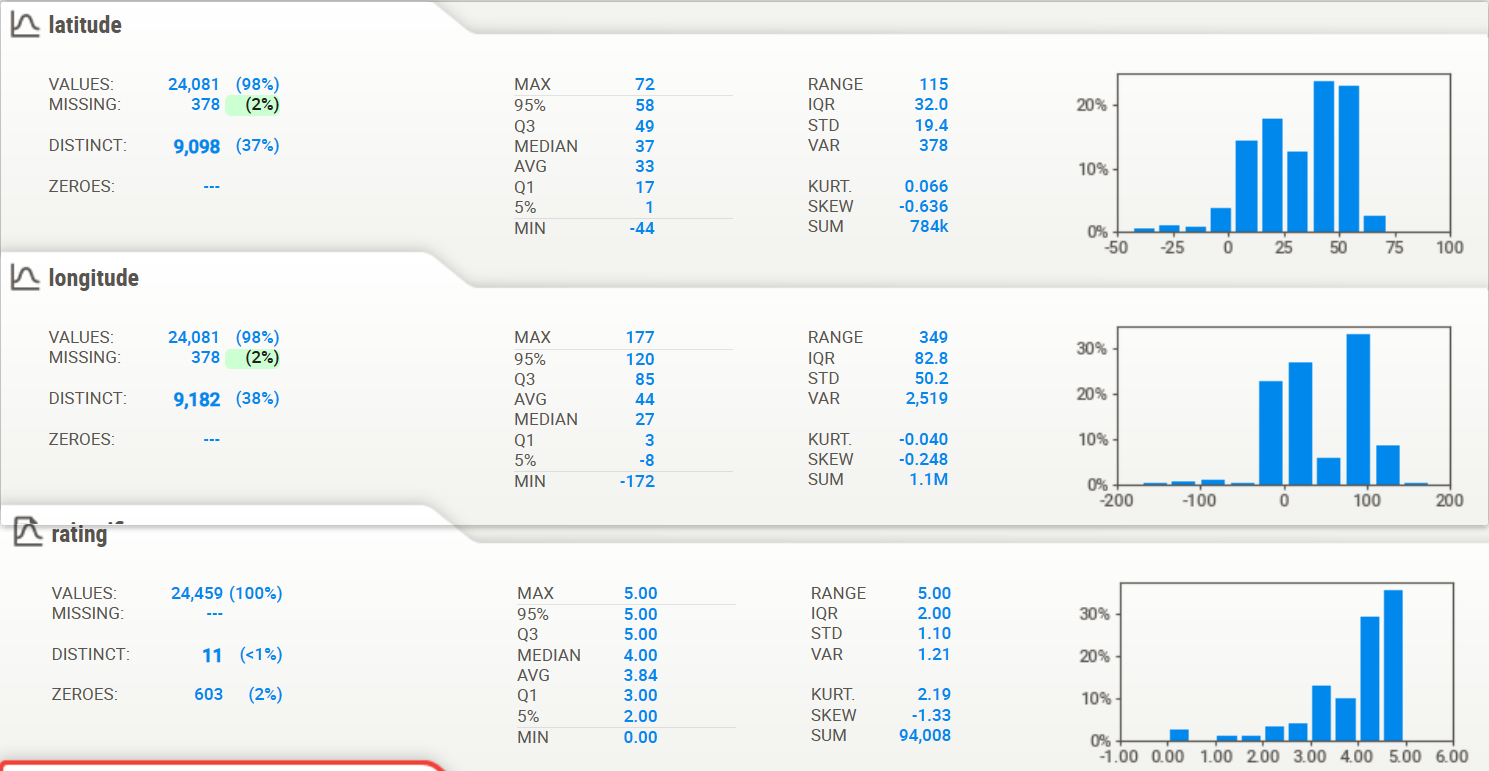


* 一共12列，24459行
* 24459条数据其中378（2%）项数据缺失
* 缺失均为经纬度数据378（2%）项
* Primary labels , Secondary Labels , Type , Scientific Name , Common Name , Author ,Filename基数足够大

primary_label分布

In [8]:
fig = px.histogram(trainmeta_df, x="primary_label", nbins=len(trainmeta_df["primary_label"].unique()))
fig.update_layout(title_text="Distribution of Primary Labels")
fig.show()

secondary_labels分布

In [9]:
secondary_df = trainmeta_df['secondary_labels'].str.replace('[','').str.replace(']','').str.replace('\'','').str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('secondary_label')
secondary_df = pd.merge(trainmeta_df.drop(columns=['secondary_labels']), secondary_df, left_index=True, right_index=True)

fig = px.histogram(secondary_df, x="secondary_label", title="Distribution of Secondary Labels")
fig.update_layout(xaxis_title="Secondary Label", yaxis_title="Count")
fig.show()

type分布

In [15]:
# Flatten the list of labels in the "type" column
labels = [label.strip("[]'") for sublist in trainmeta_df['type'].apply(ast.literal_eval) for label in sublist]

# Count the occurrence of each label
label_counts = Counter(labels)

# Create a bar plot of the label counts
fig = px.bar(x=list(label_counts.keys()), y=list(label_counts.values()))
fig.update_layout(title_text="Distribution of Types")
fig.show()

longitude&latitude

In [16]:
fig = px.scatter(trainmeta_df, x="longitude", y="latitude", color="common_name")
fig.update_layout(title="Distribution of Recordings by Location")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



rating分布

In [17]:
fig = px.histogram(trainmeta_df, x="rating", nbins=len(trainmeta_df["rating"].unique()) )
fig.update_layout(title_text="Distribution of Ratings")
fig.show()

In [26]:
fig1 = px.box(trainmeta_df, y="latitude")
fig1.update_layout(title_text="Distribution of Latitude",
                   yaxis=dict(title="Latitude"))

# create a box plot for longitude
fig2 = px.box(trainmeta_df, y="longitude")
fig2.update_layout(title_text="Distribution of Longitude",
                   yaxis=dict(title="Longitude"))

# create a box plot for rating
fig3 = px.box(trainmeta_df, y="rating")
fig3.update_layout(title_text="Distribution of Ratings",
                   yaxis=dict(title="Rating"))

# show the figures
fig1.show()
fig2.show()
fig3.show()